In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
X,y=make_blobs(n_samples=200,centers=2,cluster_std=5)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=38)
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
print('\n\n\n')
print('result:')
print('==========')
print('train dataset shape:',X_train_scaled.shape,'\ntest dataset shape:',X_test_scaled.shape)
print('\n========')
print('\n\n\n')





result:
train dataset shape: (150, 2) 
test dataset shape: (50, 2)







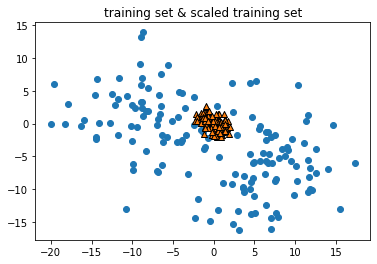

In [3]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],marker='^',edgecolor='k')
plt.title('training set & scaled training set')
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV
params={'hidden_layer_sizes':[(50,),(100,),(100,100)],'alpha':[0.0001,0.001,0.01,0.1]}
grid=GridSearchCV(MLPClassifier(max_iter=1600,random_state=38),param_grid=params,cv=3)
grid.fit(X_train_scaled,y_train)
print('\n\n\n')
print('result:')
print('========\n')
print('best score:{:.2f}'.format(grid.best_score_))
print('best params:{}'.format(grid.best_params_))
print('\n========')
print('\n\n\n')





result:

best score:0.96
best params:{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}







In [6]:
print('\n\n\n')
print('result:')
print('========\n')
print('test dataset score:{}'.format(grid.score(X_test_scaled,y_test)))
print('\n========')
print('\n\n\n')





result:

test dataset score:0.96







In [8]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('scaler',StandardScaler()),('mlp',MLPClassifier(max_iter=1600,random_state=38))])
pipeline.fit(X_train,y_train)
print('MLP score by using pipeline:{:.2f}'.format(pipeline.score(X_test,y_test)))

MLP score by using pipeline:0.98


In [13]:
params={'mlp__hidden_layer_sizes':[(50,),(100,),(100,100)],'mlp__alpha':[0.0001,0.001,0.01,0.1]}
grid=GridSearchCV(pipeline,param_grid=params,cv=3)
grid.fit(X_train,y_train)
print('\n\n\n')
print('result:')
print('============\n')
print('cross validation best score:{:.2f}'.format(grid.best_score_))
print('model best params:{}'.format(grid.best_params_))
print('testset score:{}'.format(grid.score(X_test,y_test)))
print('\n============')
print('\n\n\n')





result:

cross validation best score:0.96
model best params:{'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 100)}
testset score:0.96





